In [6]:
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

In [18]:
from __future__ import print_function

In [4]:
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np

In [7]:
# %load assignment1.py
#
# TOOD: Import whatever needs to be imported to make this work
#
# .. your code here ..


matplotlib.style.use('ggplot') # Look Pretty

In [43]:
#
# TODO: To procure the dataset, follow these steps:
# 1. Navigate to: https://data.cityofchicago.org/Public-Safety/Crimes-2001-to-present/ijzp-q8t2
# 2. In the 'Primary Type' column, click on the 'Menu' button next to the info button,
#    and select 'Filter This Column'. It might take a second for the filter option to
#    show up, since it has to load the entire list first.
# 3. Scroll down to 'GAMBLING'
# 4. Click the light blue 'Export' button next to the 'Filter' button, and select 'Download As CSV'

def doKMeans(df):
    #
    # INFO: Plot your data with a '.' marker, with 0.3 alpha at the Longitude,
    # and Latitude locations in your dataset. Longitude = x, Latitude = y
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(df.Longitude, df.Latitude, marker='.', alpha=0.3)

    #
    # TODO: Filter df so that you're only looking at Longitude and Latitude,
    # since the remaining columns aren't really applicable for this purpose.
    #
    # .. your code here ..
    longlat = df[['Longitude','Latitude']]
    #
    # TODO: Use K-Means to try and find seven cluster centers in this df.
    #
    # .. your code here ..
    kmeans_model = KMeans(n_clusters=7)
    kmeans_model.fit(longlat)
    #
    # INFO: Print and plot the centroids...
    centroids = kmeans_model.cluster_centers_
    ax.scatter(centroids[:,0], centroids[:,1], marker='x', c='red', alpha=0.5, linewidths=3, s=169)
    print (centroids)

In [ ]:
#
# TODO: Load your dataset after importing Pandas
#
# .. your code here ..
crime = pd.read_csv('Datasets/Crimes_-_2001_to_present.csv.crdownload')

In [9]:
crime.shape

(683022, 22)

In [10]:
#
# TODO: Drop any ROWs with nans in them
#
# .. your code here ..
crime = crime.dropna(axis=0)

In [11]:
crime.shape

(681811, 22)

In [27]:
#
# TODO: Print out the dtypes of your dset
#
# .. your code here ..
col_types = pd.DataFrame({'Column':crime.columns.tolist(), 'Type':[crime[c].dtype for c in crime.columns]})
col_types

,Column,Type
0,ID,int64
1,Case Number,object
2,Date,object
3,Block,object
4,IUCR,object
5,Primary Type,object
6,Description,object
7,Location Description,object
8,Arrest,bool
9,Domestic,bool


In [30]:
#
# Coerce the 'Date' feature (which is currently a string object) into real date,
# and confirm by re-printing the dtypes. NOTE: This is a slow process...
#
# .. your code here ..
crime.loc[0,'Date']

'01/14/2004 10:00:00 PM'

In [37]:
crime.Date = pd.to_datetime(crime.Date)
crime.Date.dtype

dtype('<M8[ns]')

In [40]:
crime.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,3173759,HK125763,2004-01-14 22:00:00,008XX E 48TH ST,1811,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,SIDEWALK,True,False,...,4.0,39.0,18,1182634.0,1873366.0,2004.0,04/15/2016 08:55:02 AM,41.807727,-87.605667,"(41.807727117, -87.605666575)"
1,3173760,HK171740,2004-02-08 01:00:00,079XX S KIRKLAND AVE,0820,THEFT,$500 AND UNDER,STREET,False,False,...,13.0,70.0,06,1148990.0,1851248.0,2004.0,04/15/2016 08:55:02 AM,41.747747,-87.729634,"(41.747747145, -87.72963401)"
2,3173761,HK174453,2004-02-09 22:30:00,032XX N LEAVITT ST,0460,BATTERY,SIMPLE,TAVERN/LIQUOR STORE,True,False,...,32.0,5.0,08B,1161129.0,1921326.0,2004.0,04/15/2016 08:55:02 AM,41.939806,-87.683209,"(41.939806337, -87.683208757)"
3,3173762,HK164280,2004-02-02 13:40:00,050XX S BLACKSTONE AVE,0460,BATTERY,SIMPLE,"SCHOOL, PUBLIC, BUILDING",False,False,...,4.0,39.0,08B,1186774.0,1871922.0,2004.0,04/15/2016 08:55:02 AM,41.803667,-87.590528,"(41.803667488, -87.590528166)"
4,3173764,HK176766,2004-02-10 08:00:00,011XX W LAKE ST,0810,THEFT,OVER $500,STREET,False,False,...,27.0,28.0,06,1169024.0,1901611.0,2004.0,04/15/2016 08:55:02 AM,41.885539,-87.654766,"(41.885539281, -87.654765611)"


[[-87.63561782  41.70129277]
 [-87.64232112  41.87568003]
 [-87.68481158  41.78227734]
 [-87.77306039  41.94240216]
 [-87.5951853   41.76508056]
 [-87.7227915   41.88531354]
 [-87.67728495  41.96817643]]


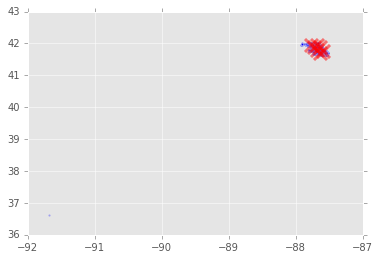

In [44]:
# INFO: Print & Plot your data
doKMeans(crime)

In [8]:
#
# TODO: Filter out the data so that it only contains samples that have
# a Date > '2011-01-01', using indexing. Then, in a new figure, plot the
# crime incidents, as well as a new K-Means run's centroids.
#
# .. your code here ..



# INFO: Print & Plot your data
doKMeans(df)
plt.show()

NameError: name 'doKMeans' is not defined